In [3]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
import cv2

import os
import random

In [31]:
dose = np.load('/home/peter/Documents/dose_estimator-git/data/numpy/dose_test.npy')
pet = np.load('/home/peter/Documents/dose_estimator-git/data/numpy/pet_test.npy')
ct = np.load('/home/peter/Documents/dose_estimator-git/data/numpy/ct_test.npy')

In [32]:
dose.shape

(405, 128, 128)

In [9]:
for x in range(0, 100):
    print(pet[x].mean())
    #print(dose[x].mean())
    print(ct[x].mean())
    print(" ")

0.0
-760.9548647301854
 
0.0
-760.8633909488562
 
0.0
-760.7912969859899
 
0.0
-760.2927564222482
 
0.0
-759.3861366950441
 
0.0
-759.0543620015378
 
0.0
-758.5676167348865
 
0.0
-757.559317572799
 
0.0
-756.4483783291071
 
8.37584913426781e-07
-755.7812417239184
 
3.2340084210602527e-06
-755.1116393486736
 
7.049673039105642e-06
-754.874255978677
 
0.0005005965824267378
-754.3749828300206
 
0.003655732414054924
-753.3815227454761
 
0.011576447215270846
-752.8886397559545
 
0.017559525631481776
-752.1470810774481
 
0.023859118091783316
-751.0383383783046
 
0.029074433630357888
-749.1277444866719
 
0.031816826247940355
-745.9822914590477
 
0.03376328051879085
-743.0068986020051
 
0.03574986904443911
-742.4702545790933
 
0.03786007117795975
-744.3748591126059
 
0.039807223418275584
-745.30167151551
 
0.041684670032916316
-745.0325630786829
 
0.04273663012535245
-742.6033844194026
 
0.04452405964982553
-737.9945493630366
 
0.048126977700354345
-734.7890152510372
 
0.05338226458152384
-735

In [10]:
def normalize_array(inp, img_size=81):
    array = inp.copy()
    for i in range(array.shape[0]):
        pic = array[i:(i+1),:,:]
        mask = (pic != 0.0)
        pic[mask] = ((pic[mask] - pic.min()) / (pic.max() - pic.min()))  # pic / np.linalg.norm(pic) -1 # 
        #pic[mask] = (pic[mask] - pic.mean()) / pic.std()
        #pic[mask] = ((pic[mask] - pic.min()) / (pic.max() - pic.min()))
        array[i:(i+1),:,:] = pic
    return array

In [11]:
def filter_zeros(array):
    bad_idx = []
    for i in range(array.shape[0]):
        if np.count_nonzero(array[i,:,:]) == 0:
            bad_idx.append(i)
    for idx in bad_idx:
        while True:
            rand_idx = random.choice(range(array.shape[0]))
            if rand_idx not in bad_idx: break
        array[idx] = array[rand_idx]
    return array

In [12]:
def upscale_array(array):
    out = np.empty((array.shape[0], 200, 200))
    for i in range(array.shape[0]):
        pic = array[i,:,:]
        out[i,:,:] = cv2.resize(pic, dsize=(200, 200))
    return out

In [13]:
dose_norm = normalize_array(dose)
pet_norm = normalize_array(pet)

In [33]:
pet_norm = filter_zeros(pet_norm)
dose_norm = filter_zeros(dose_norm)

In [34]:
pet_norm.shape

(405, 128, 128)

In [35]:
count_pet = 0
count_dose = 0
for x in range(pet_norm.shape[0]):
    if np.count_nonzero(pet_norm[x]) == 0:
        count_pet += 1
    if np.count_nonzero(dose_norm[x]) == 0:
        count_dose += 1

In [36]:
count_dose

0

In [37]:
dose_norm.shape

(405, 128, 128)

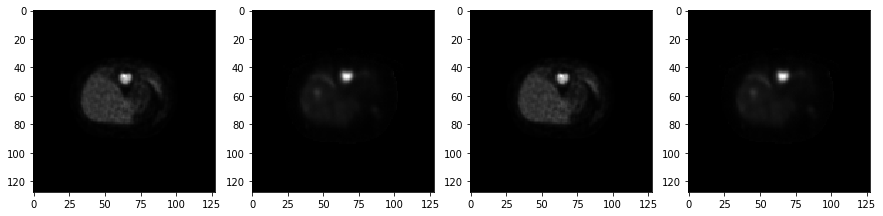

In [38]:
x = 64
fig, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].imshow(pet[x], cmap="gray")
axes[1].imshow(dose[x], cmap="gray")
axes[2].imshow(pet_norm[x], cmap="gray")
axes[3].imshow(dose_norm[x], cmap="gray")

In [26]:
np.sum(np.isnan(dose))

0